In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img= cv2.imread('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

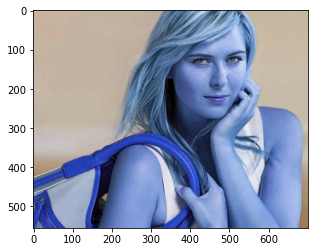

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

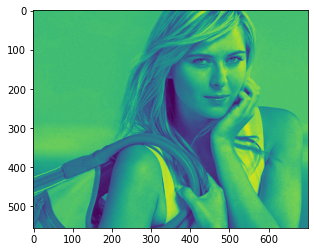

In [6]:
plt.imshow(gray)

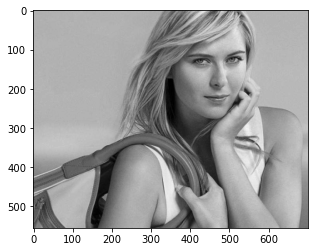

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [9]:
(x,y,w,h)= faces[0]
x,y,w,h

(352, 38, 233, 233)

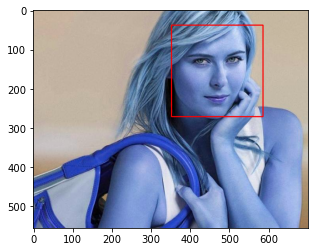

In [10]:
face_img=cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

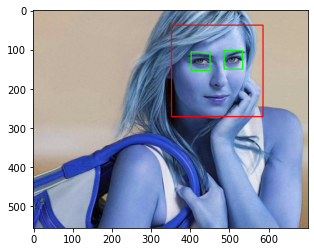

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

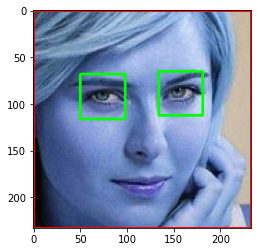

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
# def get_cropped_image_if_2_eyes(image_path):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyes) >= 2:
#             return roi_color

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return_rois = []
    for x,y,w,h in faces:
#       face_image = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
#             for (ex, ey, ew, eh) in eyes:
#                 cv2.rectangle(roi_color, (ex,ey), (ex+ew , ey+eh), (0,255,0), 2)
            return_rois.append(roi_color)

#     if len(return_rois) < 1:
#         return None
    return return_rois

#     else: 
#         return return_rois

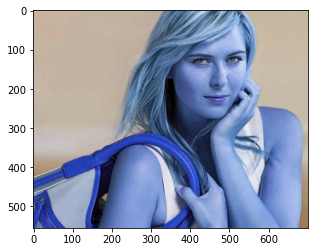

In [18]:
original_image = cv2.imread('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/test_images/sharapova1.jpg')
plt.imshow(original_image)

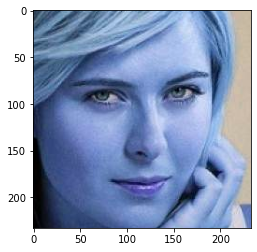

In [19]:
cropped_image = get_cropped_image_if_2_eyes('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/test_images/sharapova1.jpg')
plt.imshow(cropped_image[0])

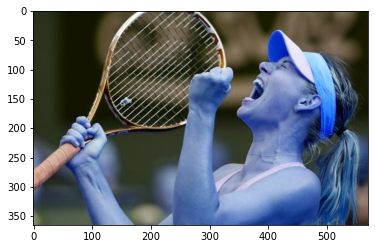

In [20]:
original_image_obstructed = cv2.imread('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/test_images/sharapova2.JPG')
plt.imshow(original_image_obstructed)

In [21]:
cropped_image_obstructed = get_cropped_image_if_2_eyes('/home/arghanath/Documents/MachineLearning/Basics/Identifying the faces of celebrities(Classification)/model/test_images/sharapova2.JPG')
cropped_image_obstructed 
#This didnt give any output because the face is obstructed and we don't want to use this image.

[]

In [22]:
path_to_data='./model/dataset/'
path_to_cr_data='./model/dataset/cropped/'

In [23]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./model/dataset/cropped',
 './model/dataset/maria_sharapova',
 './model/dataset/serena_williams',
 './model/dataset/virat_kohli',
 './model/dataset/roger_federer',
 './model/dataset/lionel_messi']

In [25]:
img_dirs=img_dirs[1:]

In [26]:
img_dirs

['./model/dataset/maria_sharapova',
 './model/dataset/serena_williams',
 './model/dataset/virat_kohli',
 './model/dataset/roger_federer',
 './model/dataset/lionel_messi']

In [27]:
import shutil
if os.path.exists(path_to_cr_data): #If the folder exists then remove the folder otherwise create the folder.
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
# cropped_image_dirs=[]
# celebruty_file_names_dict={}

# for img_dir in img_dirs:
#     count=1
#     celebrity_name=img_dir.split('/')[-1]
#     print(celebrity_name)
    
#     celebruty_file_names_dict[celebrity_name]=[]
    
#     for entry in os.scandir(img_dir):
#         roi_color=get_cropped_image_if_2_eyes(entry.path)
#         if roi_color is not None:
#             cropped_folder=path_to_cr_data + celebrity_name
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_image_dirs.append(cropped_folder)
#                 print("Generating cropped images in folder: ", cropped_folder)
                
#             cropped_file_name=celebrity_name + str(count) + ".png"
#             cropped_file_path=cropped_folder + '/' + cropped_file_name
            
#             cv2.imwrite(cropped_file_path, roi_color)
#             celebruty_file_names_dict[celebrity_name].append(cropped_file_path)
#             count+=1

cropped_image_dir = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celibrity_name = img_dir.split('/')[-1]
#     print(celibrity_name)
    celebrity_file_names_dict[celibrity_name] = []
    count = 0
    for entry in os.scandir(img_dir):

        if entry.is_dir():
            continue
        roi_colors = get_cropped_image_if_2_eyes(entry.path)
#         print(0)
        if roi_colors == None:
            continue
#         print(1)
        for roi_color in roi_colors:
            count += 1
            cropped_folder = path_to_cr_data + celibrity_name

            if not os.path.exists(cropped_folder):
                cropped_image_dir.append(cropped_folder)
                os.makedirs(cropped_folder)

            cropped_file_name = celibrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)

            celebrity_file_names_dict[celibrity_name].append(cropped_file_path)

In [29]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray=img
    #Datatype conversions
    #convert to grayscale
    imArray=cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255;
    #Compute coeffecients
    coeffs=pywt.wavedec2(imArray,mode, level=level)
    
    #Process Coefficient
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    

In [30]:
cropped_image[0]

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

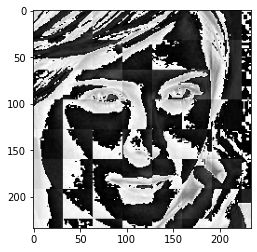

In [31]:
im_har = w2d(cropped_image[0],'db1',5)
plt.imshow(im_har, cmap='gray')

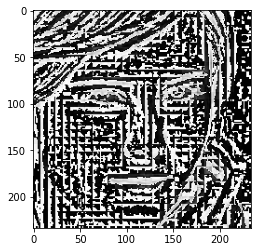

In [32]:
im_har=w2d(cropped_image[0],'db1', 3)
plt.imshow(im_har, cmap='gray')

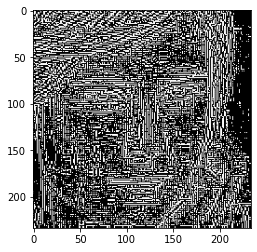

In [33]:
im_har=w2d(cropped_image[0],'db1', 1)
plt.imshow(im_har, cmap='gray')

In [71]:
celebrity_file_names_dict

{'maria_sharapova': ['./model/dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova8.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova9.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova13.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './model/dataset/cropped/maria_sharapova/maria_sha

In [72]:
class_dict={}
count=0
for celevrity_name in celebrity_file_names_dict.keys():
    class_dict[celevrity_name]=count
    count+=1
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'virat_kohli': 2,
 'roger_federer': 3,
 'lionel_messi': 4}

In [73]:
# First loop will iterate through all the sports person
#Second loop will iterate through every image of the related sports person.

X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img= cv2.resize(img,(32,32))
        img_har=w2d(img, 'db1', 5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [74]:
32*32*3 + 32*32

4096

In [75]:
len(X)

176

In [76]:
len(y)

176

In [77]:
y[0]

0

In [78]:
len(X[0])

4096

In [79]:
X[0]

array([[ 75],
       [157],
       [212],
       ...,
       [  1],
       [210],
       [ 71]], dtype=uint8)

In [80]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(176, 4096)

In [81]:
X[0]

array([ 75., 157., 212., ...,   1., 210.,  71.])

In [82]:
y[0]

0

In [83]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [84]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [85]:
pipe=Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', C=10))])

In [86]:
X_train

array([[ 35.,  32.,  31., ..., 215., 136.,  20.],
       [247., 241., 246., ...,   1., 198.,   8.],
       [  9.,  18.,  26., ..., 139.,  15.,  10.],
       ...,
       [ 48.,  43.,  44., ...,  23.,  23., 223.],
       [  1.,   0.,   2., ...,  54., 104., 206.],
       [228., 223., 222., ...,   0.,   0.,   0.]])

In [87]:
labels=np.unique(y)

In [88]:
y_train

[4,
 0,
 3,
 2,
 4,
 0,
 2,
 3,
 1,
 4,
 0,
 2,
 4,
 3,
 2,
 4,
 3,
 0,
 3,
 3,
 2,
 4,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 4,
 3,
 4,
 2,
 3,
 4,
 1,
 4,
 4,
 1,
 3,
 3,
 2,
 1,
 1,
 2,
 0,
 3,
 0,
 4,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 4,
 2,
 0,
 2,
 2,
 2,
 3,
 0,
 3,
 4,
 0,
 0,
 2,
 4,
 1,
 0,
 3,
 2,
 1,
 1,
 1,
 4,
 1,
 0,
 3,
 4,
 1,
 2,
 4,
 0,
 1,
 3,
 1,
 3,
 3,
 0,
 0,
 3,
 0,
 4,
 3,
 4,
 0,
 4,
 4,
 4,
 0,
 2,
 2,
 2,
 3,
 4,
 4,
 2,
 2,
 0,
 2,
 4,
 4,
 1,
 1,
 4,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 3,
 1,
 4]

In [89]:
labels

array([0, 1, 2, 3, 4])

In [90]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8636363636363636

In [91]:
len(X_test)

44

In [92]:
len(X_train)

132

In [93]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      0.90      0.95        10
           2       1.00      0.67      0.80         9
           3       0.78      0.88      0.82         8
           4       0.73      1.00      0.84         8

    accuracy                           0.86        44
   macro avg       0.88      0.87      0.86        44
weighted avg       0.89      0.86      0.86        44



In [94]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [95]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,5,10,50,100,500,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10,20,50,100]
        }
    },
    'logisiticRegression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,20,50,100]
        }
    }
}

In [96]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(), mp['model'])
    clf=GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
    df= pd.DataFrame(scores, columns=['model','best_score','best_params'])
    df

In [97]:
df

,model,best_score,best_params
0,svm,0.833618,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.819088,{'randomforestclassifier__n_estimators': 50}
2,logisiticRegression,0.871225,{'logisticregression__C': 1}


In [98]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=50))]),
 'logisiticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(X_test,y_test)

0.8636363636363636

In [100]:
best_estimators['random_forest'].score(X_test,y_test)

0.8636363636363636

In [101]:
best_estimators['logisiticRegression'].score(X_test,y_test)

0.9318181818181818

In [102]:
best_clf= best_estimators['logisiticRegression']

In [103]:
 from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  7,  0,  1],
       [ 0,  0,  0,  8,  0],
       [ 1,  0,  0,  0,  7]])

Text(69.0, 0.5, 'Truth')

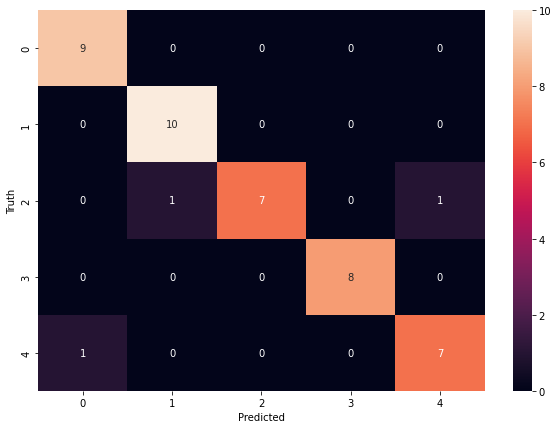

In [104]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'virat_kohli': 2,
 'roger_federer': 3,
 'lionel_messi': 4}

In [108]:
import joblib
# Saving the trained model in a pickle file
joblib.dump(best_clf,'celebrity_detection_model.pkl')

['celebrity_detection_model.pkl']

In [109]:
import json
with open('celebrity_class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))